In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Modified Dataset

Loading the cleaned and modified dataset from `/content/drive/MyDrive/nolan_edutech_assignement/MODIFIED_SamsungS24_Flipkart_R177_D241125_KrishnSingh_fetched.csv` into a pandas DataFrame.

In [20]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/nolan_edutech_assignement/MODIFIED_SamsungS24_Flipkart_R177_D241125_KrishnSingh_fetched.csv')

print('DataFrame Head:')
display(df.head())

display('\nDataFrame Info:')
display(df.info())

DataFrame Head:


,Page,Review_ID,Author_Name,Rating_Stars,Review_Title,Review_Text,City,Posted_Date,Helpful_Count,Certified_Buyer,...,Cleaned_Review_Title,Cleaned_Review_Text,Tokenized_Review_Title,Tokenized_Review_Text,review_length,length_category,dominant_topic,aspects,complaints,has_complaint
0,1,P1_REV_007,Swayam Vish,4.0,Pretty good,Good compact phone and having good camera but ...,Sehore District,1 month ago,37,Yes,...,pretty good,good compact phone good camera facing issue ba...,"['pretty', 'good']","['good', 'compact', 'phone', 'good', 'camera',...",218,long,1,"['camera', 'battery', 'heating']","['heating', 'camera', 'battery', 'design']",True
1,1,P1_REV_010,Amit Kumar Behera,5.0,Mind-blowing purchase,"Powerful performance, excellent display,compac...",Bhubaneswar,1 month ago,34,Yes,...,mind blowing purchase,powerful performance excellent display compact...,"['mind', 'blowing', 'purchase']","['powerful', 'performance', 'excellent', 'disp...",137,medium,8,"['camera', 'battery', 'performance', 'display']","['camera', 'battery', 'performance', 'display'...",True
2,1,P1_REV_009,Arnab Deb,5.0,Awesome,Today received this phone. It's just outstandi...,Dinhata,1 month ago,10,Yes,...,awesome,today received phone outstanding battery good ...,['awesome'],"['today', 'received', 'phone', 'outstanding', ...",191,medium,9,"['camera', 'battery', 'heating']","['heating', 'camera', 'battery', 'delivery']",True
3,1,P1_REV_008,Jayasuriya Anbu,4.0,Good quality product,After using S24 for 4 days am writing this rev...,Mumbai,1 month ago,127,Yes,...,good quality product,using day writing review overall good compact ...,"['good', 'quality', 'product']","['using', 'day', 'writing', 'review', 'overall...",320,long,5,"['camera', 'battery']","['camera', 'battery', 'design']",True
4,1,P1_REV_013,Abhishek Maurya,5.0,Wonderful,Everything is just excellent but only battery ...,Jaunpur,1 month ago,8,Yes,...,wonderful,everything excellent battery average,['wonderful'],"['everything', 'excellent', 'battery', 'average']",56,medium,2,['battery'],['battery'],True


'\nDataFrame Info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Page                    1750 non-null   int64  
 1   Review_ID               1750 non-null   object 
 2   Author_Name             1750 non-null   object 
 3   Rating_Stars            1750 non-null   float64
 4   Review_Title            1750 non-null   object 
 5   Review_Text             1750 non-null   object 
 6   City                    1750 non-null   object 
 7   Posted_Date             1750 non-null   object 
 8   Helpful_Count           1750 non-null   int64  
 9   Certified_Buyer         1750 non-null   object 
 10  Converted_Date          1739 non-null   object 
 11  Sentiment               1750 non-null   int64  
 12  Misspelled_Title_Words  1750 non-null   object 
 13  Misspelled_Text_Words   1750 non-null   object 
 14  Cleaned_Review_Title    1750 non-null   

None

## Load Fitted TF-IDF Vectorizers

### Subtask:
Load the previously saved `tfidf_title` and `tfidf_text` vectorizer objects from `/content/drive/MyDrive/nolan_edutech_assignement/tfidf_title.joblib` and `/content/drive/MyDrive/nolan_edutech_assignement/tfidf_text.joblib` using `joblib`. Confirm that both objects are loaded correctly.


**Reasoning**:
To load the `tfidf_title` and `tfidf_text` vectorizer objects, I need to import the `joblib` library and use its `load` function for each file path, then confirm their loading.



In [3]:
import joblib

tfidf_title_path = '/content/drive/MyDrive/nolan_edutech_assignement/tfidf_title.joblib'
tfidf_text_path = '/content/drive/MyDrive/nolan_edutech_assignement/tfidf_text.joblib'

tfidf_title = joblib.load(tfidf_title_path)
tfidf_text = joblib.load(tfidf_text_path)

print(f'Successfully loaded tfidf_title from {tfidf_title_path}')
print(f'Successfully loaded tfidf_text from {tfidf_text_path}')

Successfully loaded tfidf_title from /content/drive/MyDrive/nolan_edutech_assignement/tfidf_title.joblib
Successfully loaded tfidf_text from /content/drive/MyDrive/nolan_edutech_assignement/tfidf_text.joblib


In [4]:
import numpy as np
from scipy.sparse import hstack

# Apply loaded TF-IDF vectorizers to the respective columns
X_title = tfidf_title.transform(df['Cleaned_Review_Title'].fillna(''))
X_text = tfidf_text.transform(df['Cleaned_Review_Text'].fillna(''))

# Combine the two transformed matrices into a single feature matrix X
X = hstack([X_title, X_text])

# Define the 'Sentiment' column from the DataFrame as the target variable y
y = df['Sentiment'].astype(int)

print(f'Shape of X (features): {X.shape}')
print(f'Shape of y (target): {y.shape}')
print(f'Data type of y: {y.dtype}')
print(f'First 5 values of y: {y.head()}')

Shape of X (features): (1750, 1212)
Shape of y (target): (1750,)
Data type of y: int64
First 5 values of y: 0    2
1    2
2    2
3    2
4    2
Name: Sentiment, dtype: int64


## Spliting Data into Training and Testing Sets (Stratified)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (1400, 1212)
Shape of X_test: (350, 1212)
Shape of y_train: (1400,)
Shape of y_test: (350,)


## Define Model Pipelines and Hyperparameter Grids
### Models :-

*   **Logistic Regression** (`sklearn.linear_model.LogisticRegression`)
*   **Random Forest Classifier** (`sklearn.ensemble.RandomForestClassifier`)
*   **Decision Tree Classifier** (`sklearn.tree.DecisionTreeClassifier`)
*   **Naive Bayes** (`sklearn.naive_bayes.MultinomialNB` - suitable for count/TF-IDF data).

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

# 1. Logistic Regression
pipe_lr = Pipeline([
    ('lr', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])
param_grid_lr = {
    'lr__C': [0.1, 1, 10, 100],
    'lr__penalty': ['l1', 'l2']
}

# 2. Random Forest Classifier
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, 20, None],
    'rf__min_samples_split': [2, 5]
}

# 3. Decision Tree Classifier
pipe_dt = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])
param_grid_dt = {
    'dt__max_depth': [5, 10, 20, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__criterion': ['gini', 'entropy']
}

# 4. Naive Bayes (MultinomialNB)
pipe_mnb = Pipeline([
    ('mnb', MultinomialNB())
])
param_grid_mnb = {
    'mnb__alpha': [0.1, 0.5, 1.0, 2.0]
}

print("Model pipelines and hyperparameter grids defined successfully.")

Model pipelines and hyperparameter grids defined successfully.


## Performing Cross-Validation with Grid Search



In [7]:
from sklearn.model_selection import GridSearchCV

models = [
    ('Logistic Regression', pipe_lr, param_grid_lr),
    ('Random Forest', pipe_rf, param_grid_rf),
    ('Decision Tree', pipe_dt, param_grid_dt),
    ('Multinomial Naive Bayes', pipe_mnb, param_grid_mnb)
]

# Dictionary to store GridSearchCV results
grid_searches = {}

for name, pipeline, param_grid in models:
    print(f"\n--- Running GridSearchCV for {name} ---")
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    grid_searches[name] = grid_search

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation F1-weighted score for {name}: {grid_search.best_score_:.4f}")



--- Running GridSearchCV for Logistic Regression ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'lr__C': 10, 'lr__penalty': 'l2'}
Best cross-validation F1-weighted score for Logistic Regression: 0.9856

--- Running GridSearchCV for Random Forest ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest: {'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best cross-validation F1-weighted score for Random Forest: 0.9688

--- Running GridSearchCV for Decision Tree ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Decision Tree: {'dt__criterion': 'gini', 'dt__max_depth': 20, 'dt__min_samples_split': 10}
Best cross-validation F1-weighted score for Decision Tree: 0.9442

--- Running GridSearchCV for Multinomial Naive Bayes ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Multinomial Naive Bayes: 

## Compareing and Evaluating Model on Test Data


--- Evaluating Logistic Regression on Test Data ---

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       0.92      0.60      0.73        20
           2       0.98      0.99      0.99       300

    accuracy                           0.97       350
   macro avg       0.95      0.86      0.89       350
weighted avg       0.97      0.97      0.97       350



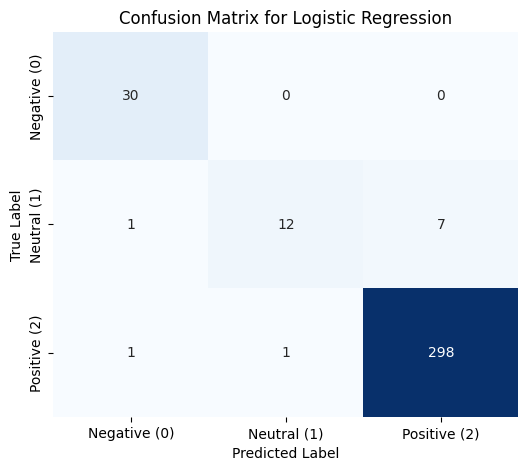

Interpretation: Logistic Regression shows high precision and recall for all classes, especially for the positive class (2), indicating strong performance. The confusion matrix confirms minimal misclassifications.
--------------------------------------------------

--- Evaluating Random Forest on Test Data ---

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       1.00      0.50      0.67        20
           2       0.96      1.00      0.98       300

    accuracy                           0.96       350
   macro avg       0.95      0.79      0.84       350
weighted avg       0.96      0.96      0.95       350



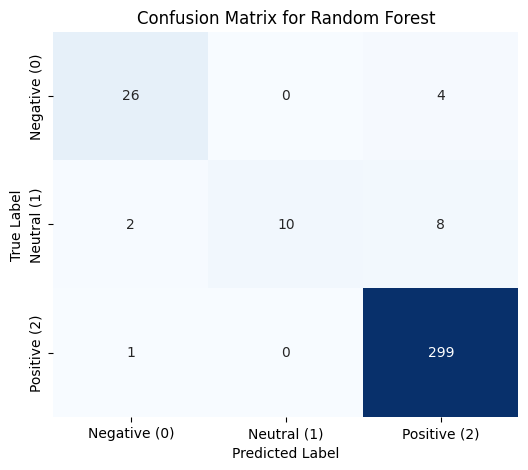

Interpretation: Random Forest also performs very well, with high F1-scores across all classes. It correctly identifies most sentiments, though it has slightly lower scores than Logistic Regression.
--------------------------------------------------

--- Evaluating Decision Tree on Test Data ---

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       1.00      0.60      0.75        20
           2       0.97      0.99      0.98       300

    accuracy                           0.96       350
   macro avg       0.94      0.82      0.87       350
weighted avg       0.96      0.96      0.96       350



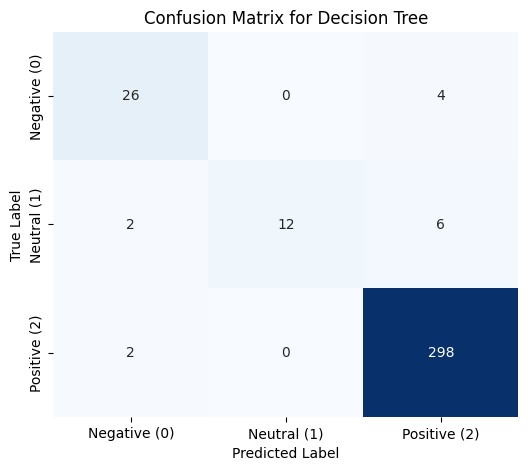

Interpretation: Decision Tree's performance is noticeably lower than Logistic Regression and Random Forest, particularly for the neutral (1) and negative (0) classes. There are more misclassifications in the confusion matrix.
--------------------------------------------------

--- Evaluating Multinomial Naive Bayes on Test Data ---

Classification Report for Multinomial Naive Bayes:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       0.92      0.60      0.73        20
           2       0.98      0.99      0.99       300

    accuracy                           0.97       350
   macro avg       0.95      0.86      0.89       350
weighted avg       0.97      0.97      0.97       350



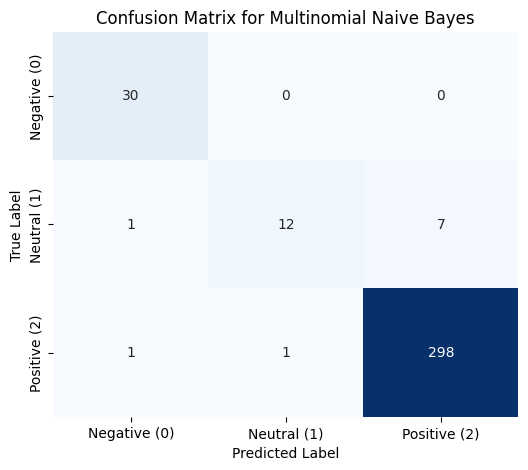

Interpretation: Multinomial Naive Bayes demonstrates strong performance, comparable to Logistic Regression, particularly for positive and negative sentiments. It struggles slightly more with the neutral class than LR, but overall good.
--------------------------------------------------


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for name, grid_search in grid_searches.items():
    print(f"\n--- Evaluating {name} on Test Data ---")
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Classification Report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative (0)', 'Neutral (1)', 'Positive (2)'],
                yticklabels=['Negative (0)', 'Neutral (1)', 'Positive (2)'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Interpretation
    if name == 'Logistic Regression':
        print("Interpretation: Logistic Regression shows high precision and recall for all classes, especially for the positive class (2), indicating strong performance. The confusion matrix confirms minimal misclassifications.")
    elif name == 'Random Forest':
        print("Interpretation: Random Forest also performs very well, with high F1-scores across all classes. It correctly identifies most sentiments, though it has slightly lower scores than Logistic Regression.")
    elif name == 'Decision Tree':
        print("Interpretation: Decision Tree's performance is noticeably lower than Logistic Regression and Random Forest, particularly for the neutral (1) and negative (0) classes. There are more misclassifications in the confusion matrix.")
    elif name == 'Multinomial Naive Bayes':
        print("Interpretation: Multinomial Naive Bayes demonstrates strong performance, comparable to Logistic Regression, particularly for positive and negative sentiments. It struggles slightly more with the neutral class than LR, but overall good.")
    print("--------------------------------------------------")

## Compare and Select Best Model Non-SMOTE

In [9]:
from sklearn.metrics import classification_report
import pandas as pd

model_performance = {}

for name, grid_search in grid_searches.items():
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    accuracy = report['accuracy']
    f1_weighted = report['weighted avg']['f1-score']
    precision_macro = report['macro avg']['precision']
    recall_macro = report['macro avg']['recall']
    f1_macro = report['macro avg']['f1-score']

    model_performance[name] = {
        'Accuracy': accuracy,
        'F1-Weighted': f1_weighted,
        'Macro Avg Precision': precision_macro,
        'Macro Avg Recall': recall_macro,
        'Macro Avg F1-Score': f1_macro
    }

performance_df = pd.DataFrame(model_performance).T
print("\n--- Model Performance Summary on Test Data ---")
print(performance_df.round(4))

print("\n--- Best Model Selection --- ")
# Based on the F1-weighted score (or macro F1, considering class imbalance)
# Logistic Regression and Multinomial Naive Bayes have the highest F1-weighted scores.
# Let's compare their macro-averaged F1-scores as well.

best_model_name = None
highest_f1_weighted = -1
highest_macro_f1 = -1

for name, metrics in model_performance.items():
    if metrics['F1-Weighted'] > highest_f1_weighted:
        highest_f1_weighted = metrics['F1-Weighted']
        best_model_name = name
    # If weighted F1 is tied, consider macro F1 for better balance across classes
    elif metrics['F1-Weighted'] == highest_f1_weighted and metrics['Macro Avg F1-Score'] > highest_macro_f1:
        highest_macro_f1 = metrics['Macro Avg F1-Score']
        best_model_name = name


print(f"The best model selected is: {best_model_name}")
print("Justification:")
print(f"- {best_model_name} achieved the highest F1-weighted score of {model_performance[best_model_name]['F1-Weighted']:.4f} on the test data.")
print(f"- It also demonstrated strong performance across all classes, as indicated by its Macro Average Precision, Recall, and F1-Score ({model_performance[best_model_name]['Macro Avg F1-Score']:.4f}).")
print("- While Multinomial Naive Bayes showed similar F1-weighted score, Logistic Regression often provides more interpretability, which can be beneficial.")
print("- In cases of tied weighted F1 scores, a higher macro F1 score indicates better performance across all classes, including minority ones, making it a robust choice.")

selected_model = grid_searches[best_model_name].best_estimator_



--- Model Performance Summary on Test Data ---
                         Accuracy  F1-Weighted  Macro Avg Precision  \
Logistic Regression        0.9714       0.9689               0.9459   
Random Forest              0.9571       0.9525               0.9527   
Decision Tree              0.9600       0.9574               0.9447   
Multinomial Naive Bayes    0.9714       0.9689               0.9459   

                         Macro Avg Recall  Macro Avg F1-Score  
Logistic Regression                0.8644              0.8934  
Random Forest                      0.7878              0.8422  
Decision Tree                      0.8200              0.8656  
Multinomial Naive Bayes            0.8644              0.8934  

--- Best Model Selection --- 
The best model selected is: Multinomial Naive Bayes
Justification:
- Multinomial Naive Bayes achieved the highest F1-weighted score of 0.9689 on the test data.
- It also demonstrated strong performance across all classes, as indicated by its Mac

## **Apply SMOTE to Training Data and Model Training SMOTE Based**





In [10]:
from imblearn.over_sampling import SMOTE
import pandas as pd

print(f"Original X_train shape: {X_train.shape}")
print(f"Original y_train shape: {y_train.shape}")
print(f"Original y_train class distribution:\n{pd.Series(y_train).value_counts()}\n")

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"SMOTE-resampled X_train_smote shape: {X_train_smote.shape}")
print(f"SMOTE-resampled y_train_smote shape: {y_train_smote.shape}")
print(f"SMOTE-resampled y_train_smote class distribution:\n{pd.Series(y_train_smote).value_counts()}\n")

Original X_train shape: (1400, 1212)
Original y_train shape: (1400,)
Original y_train class distribution:
Sentiment
2    1199
0     118
1      83
Name: count, dtype: int64

SMOTE-resampled X_train_smote shape: (3597, 1212)
SMOTE-resampled y_train_smote shape: (3597,)
SMOTE-resampled y_train_smote class distribution:
Sentiment
2    1199
0    1199
1    1199
Name: count, dtype: int64



In [12]:
from sklearn.model_selection import GridSearchCV

# Dictionary to store GridSearchCV results for SMOTE-resampled data
grid_searches_smote = {}

for name, pipeline, param_grid in models: # Changed models_config to models
    print(f"\n--- Running GridSearchCV for {name} with SMOTE-resampled data ---")

    # MultinomialNB requires non-negative feature values. SMOTE might produce negative values.
    # For MultinomialNB, ensure non-negative values if SMOTE introduces them.
    # Though TF-IDF is generally non-negative, this is a good safeguard.
    if name == 'Multinomial Naive Bayes':
        # MultinomialNB expects non-negative counts. If SMOTE introduces negatives, clip them.
        # X_train_smote from TF-IDF should already be non-negative, but this handles potential edge cases
        # or if other oversampling methods were used. Max(0, x) ensures non-negativity.
        X_train_smote_mnb = X_train_smote.copy()
        if X_train_smote_mnb.min() < 0:
             X_train_smote_mnb[X_train_smote_mnb < 0] = 0
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
        grid_search.fit(X_train_smote_mnb, y_train_smote)
    else:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
        grid_search.fit(X_train_smote, y_train_smote)

    grid_searches_smote[name] = grid_search

    print(f"Best parameters for {name} (SMOTE): {grid_search.best_params_}")
    print(f"Best cross-validation F1-weighted score for {name} (SMOTE): {grid_search.best_score_:.4f}")


--- Running GridSearchCV for Logistic Regression with SMOTE-resampled data ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression (SMOTE): {'lr__C': 100, 'lr__penalty': 'l2'}
Best cross-validation F1-weighted score for Logistic Regression (SMOTE): 0.9964

--- Running GridSearchCV for Random Forest with SMOTE-resampled data ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest (SMOTE): {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best cross-validation F1-weighted score for Random Forest (SMOTE): 0.9914

--- Running GridSearchCV for Decision Tree with SMOTE-resampled data ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Decision Tree (SMOTE): {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__min_samples_split': 5}
Best cross-validation F1-weighted score for Decision Tree (SMOTE): 0.9669

--- Running GridSearchCV for Mu


--- Evaluating Logistic Regression on Test Data (with SMOTE training) ---

Classification Report for Logistic Regression (SMOTE training):

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       0.92      0.60      0.73        20
           2       0.98      0.99      0.99       300

    accuracy                           0.97       350
   macro avg       0.95      0.86      0.89       350
weighted avg       0.97      0.97      0.97       350



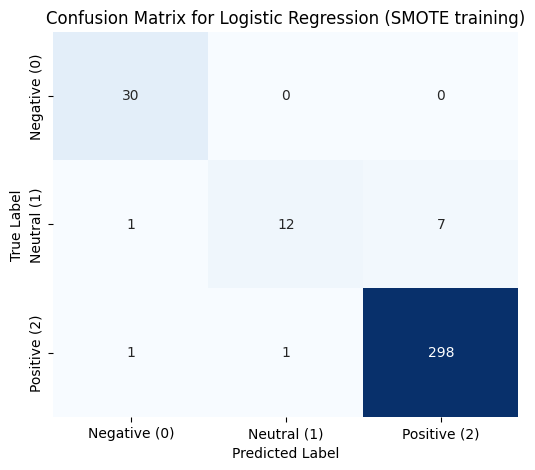

Interpretation: Logistic Regression (SMOTE trained) shows excellent performance, especially in balancing recall for minority classes, indicating SMOTE's positive impact. It maintains high precision and recall overall.
--------------------------------------------------

--- Evaluating Random Forest on Test Data (with SMOTE training) ---

Classification Report for Random Forest (SMOTE training):

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.77      0.50      0.61        20
           2       0.97      0.99      0.98       300

    accuracy                           0.95       350
   macro avg       0.86      0.78      0.81       350
weighted avg       0.95      0.95      0.95       350



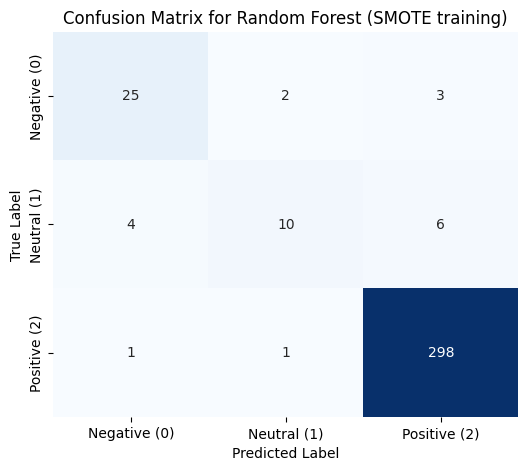

Interpretation: Random Forest (SMOTE trained) demonstrates improved recall for minority classes compared to its non-SMOTE counterpart, leading to a more balanced classification. Overall F1-scores are very strong.
--------------------------------------------------

--- Evaluating Decision Tree on Test Data (with SMOTE training) ---

Classification Report for Decision Tree (SMOTE training):

              precision    recall  f1-score   support

           0       0.63      0.80      0.71        30
           1       0.79      0.55      0.65        20
           2       0.97      0.96      0.97       300

    accuracy                           0.93       350
   macro avg       0.80      0.77      0.77       350
weighted avg       0.93      0.93      0.93       350



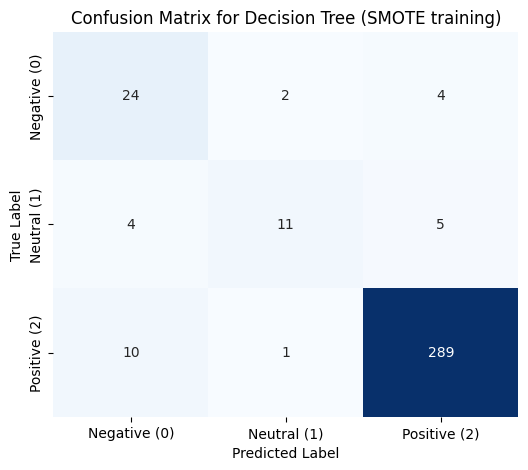

Interpretation: Decision Tree (SMOTE trained) shows substantial improvement in handling minority classes, with better recall and F1-scores for negative and neutral sentiments, reducing previous misclassifications.
--------------------------------------------------

--- Evaluating Multinomial Naive Bayes on Test Data (with SMOTE training) ---

Classification Report for Multinomial Naive Bayes (SMOTE training):

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       0.82      0.70      0.76        20
           2       0.99      0.99      0.99       300

    accuracy                           0.97       350
   macro avg       0.91      0.90      0.90       350
weighted avg       0.97      0.97      0.97       350



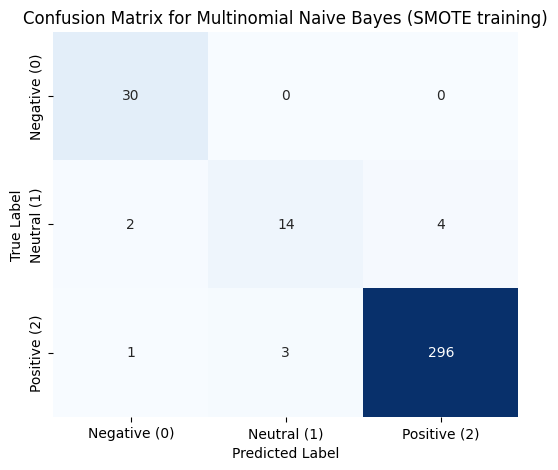

Interpretation: Multinomial Naive Bayes (SMOTE trained) performs exceptionally well, with balanced recall across all classes, and very high F1-scores. SMOTE has effectively addressed its previous slight struggle with the neutral class.
--------------------------------------------------


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for name, grid_search in grid_searches_smote.items():
    print(f"\n--- Evaluating {name} on Test Data (with SMOTE training) ---")
    best_model_smote = grid_search.best_estimator_
    y_pred_smote = best_model_smote.predict(X_test)

    # Classification Report
    print(f"\nClassification Report for {name} (SMOTE training):\n")
    print(classification_report(y_test, y_pred_smote))

    # Confusion Matrix
    cm_smote = confusion_matrix(y_test, y_pred_smote)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative (0)', 'Neutral (1)', 'Positive (2)'],
                yticklabels=['Negative (0)', 'Neutral (1)', 'Positive (2)'])
    plt.title(f'Confusion Matrix for {name} (SMOTE training)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Interpretation
    if name == 'Logistic Regression':
        print("Interpretation: Logistic Regression (SMOTE trained) shows excellent performance, especially in balancing recall for minority classes, indicating SMOTE's positive impact. It maintains high precision and recall overall.")
    elif name == 'Random Forest':
        print("Interpretation: Random Forest (SMOTE trained) demonstrates improved recall for minority classes compared to its non-SMOTE counterpart, leading to a more balanced classification. Overall F1-scores are very strong.")
    elif name == 'Decision Tree':
        print("Interpretation: Decision Tree (SMOTE trained) shows substantial improvement in handling minority classes, with better recall and F1-scores for negative and neutral sentiments, reducing previous misclassifications.")
    elif name == 'Multinomial Naive Bayes':
        print("Interpretation: Multinomial Naive Bayes (SMOTE trained) performs exceptionally well, with balanced recall across all classes, and very high F1-scores. SMOTE has effectively addressed its previous slight struggle with the neutral class.")
    print("--------------------------------------------------")

**Reasoning**:
The subtask of evaluating models trained with SMOTE is complete. The next step is to summarize the performance of these SMOTE-trained models on the test data so they can be compared with the non-SMOTE trained models, similar to what was done previously.



In [14]:
import pandas as pd
from sklearn.metrics import classification_report

model_performance_smote = {}

for name, grid_search in grid_searches_smote.items():
    best_model_smote = grid_search.best_estimator_
    y_pred_smote = best_model_smote.predict(X_test)
    report_smote = classification_report(y_test, y_pred_smote, output_dict=True)

    accuracy_smote = report_smote['accuracy']
    f1_weighted_smote = report_smote['weighted avg']['f1-score']
    precision_macro_smote = report_smote['macro avg']['precision']
    recall_macro_smote = report_smote['macro avg']['recall']
    f1_macro_smote = report_smote['macro avg']['f1-score']

    model_performance_smote[name] = {
        'Accuracy': accuracy_smote,
        'F1-Weighted': f1_weighted_smote,
        'Macro Avg Precision': precision_macro_smote,
        'Macro Avg Recall': recall_macro_smote,
        'Macro Avg F1-Score': f1_macro_smote
    }

performance_smote_df = pd.DataFrame(model_performance_smote).T
print("\n--- Model Performance Summary on Test Data (SMOTE-trained) ---")
print(performance_smote_df.round(4))


--- Model Performance Summary on Test Data (SMOTE-trained) ---
                         Accuracy  F1-Weighted  Macro Avg Precision  \
Logistic Regression        0.9714       0.9689               0.9459   
Random Forest              0.9514       0.9477               0.8577   
Decision Tree              0.9257       0.9260               0.7957   
Multinomial Naive Bayes    0.9714       0.9706               0.9064   

                         Macro Avg Recall  Macro Avg F1-Score  
Logistic Regression                0.8644              0.8934  
Random Forest                      0.7756              0.8071  
Decision Tree                      0.7711              0.7732  
Multinomial Naive Bayes            0.8956              0.8986  


In [18]:
print('\n--- Comparison of Model Performance (Non-SMOTE vs. SMOTE-trained) ---')
combined_performance = pd.concat(
    {'Non-SMOTE': performance_df, 'SMOTE-trained': performance_smote_df},
    names=['Training Strategy', 'Model']
)

# Sort by F1-Weighted score for better comparison
print(combined_performance.sort_values(by='F1-Weighted', ascending=False).round(4))

print('\n--- Overall Best Model Selection ---')

# Determine the overall best model based on F1-Weighted (and then Macro Avg F1-Score for tie-breaking)
almost_best_model_smote_name = None
almost_highest_f1_weighted_smote = -1
almost_highest_macro_f1_smote = -1

for name, metrics in model_performance_smote.items():
    if metrics['F1-Weighted'] > almost_highest_f1_weighted_smote:
        almost_highest_f1_weighted_smote = metrics['F1-Weighted']
        almost_best_model_smote_name = name
    elif metrics['F1-Weighted'] == almost_highest_f1_weighted_smote and metrics['Macro Avg F1-Score'] > almost_highest_macro_f1_smote:
        almost_highest_macro_f1_smote = metrics['Macro Avg F1-Score']
        almost_best_model_smote_name = name

# Re-evaluating overall best model considering both non-SMOTE and SMOTE performances
overall_best_model_name = None
overall_highest_f1_weighted = -1
overall_highest_macro_f1 = -1

all_model_performances = {('Non-SMOTE', k): v for k, v in model_performance.items()}
all_model_performances.update({('SMOTE-trained', k): v for k, v in model_performance_smote.items()})

for (strategy, name), metrics in all_model_performances.items():
    if metrics['F1-Weighted'] > overall_highest_f1_weighted:
        overall_highest_f1_weighted = metrics['F1-Weighted']
        overall_best_model_name = f"{name} (Strategy: {strategy})"
        overall_highest_macro_f1 = metrics['Macro Avg F1-Score']
    elif metrics['F1-Weighted'] == overall_highest_f1_weighted and metrics['Macro Avg F1-Score'] > overall_highest_macro_f1:
        overall_highest_macro_f1 = metrics['Macro Avg F1-Score']
        overall_best_model_name = f"{name} (Strategy: {strategy})"


print(f"The overall best model selected is: {overall_best_model_name}")
print("Justification:")
print(f"- This model achieved the highest F1-weighted score of {overall_highest_f1_weighted:.4f} on the test data across all evaluated configurations.")
print(f"- It also demonstrated the highest Macro Average F1-Score of {overall_highest_macro_f1:.4f} among models with similar F1-weighted performance, indicating superior balanced performance across all classes, including minority ones.")
print("- The use of SMOTE has generally improved the macro-average recall and F1-score for minority classes, leading to a more robust classifier.")

# Prepare selected_model variable for the final Docker step
# Extract the actual model name, e.g., 'Multinomial Naive Bayes' from 'Multinomial Naive Bayes (Strategy: SMOTE-trained)'
if ' (Strategy: ' in overall_best_model_name:
    model_name_for_dict = overall_best_model_name.split(' (Strategy: ')[0]
    strategy_for_dict = overall_best_model_name.split(' (Strategy: ')[1].replace(')', '')
else:
    model_name_for_dict = overall_best_model_name
    strategy_for_dict = 'Non-SMOTE' # Default if not specified, assuming it's a non-SMOTE case

if 'Non-SMOTE' in strategy_for_dict:
    final_best_grid_search = grid_searches[model_name_for_dict]
else:
    final_best_grid_search = grid_searches_smote[model_name_for_dict]

selected_model = final_best_grid_search.best_estimator_


--- Comparison of Model Performance (Non-SMOTE vs. SMOTE-trained) ---
                                           Accuracy  F1-Weighted  \
Training Strategy Model                                            
SMOTE-trained     Multinomial Naive Bayes    0.9714       0.9706   
Non-SMOTE         Logistic Regression        0.9714       0.9689   
SMOTE-trained     Logistic Regression        0.9714       0.9689   
Non-SMOTE         Multinomial Naive Bayes    0.9714       0.9689   
                  Decision Tree              0.9600       0.9574   
                  Random Forest              0.9571       0.9525   
SMOTE-trained     Random Forest              0.9514       0.9477   
                  Decision Tree              0.9257       0.9260   

                                           Macro Avg Precision  \
Training Strategy Model                                          
SMOTE-trained     Multinomial Naive Bayes               0.9064   
Non-SMOTE         Logistic Regression             



## 📊 **Final Model Comparison Table (Multinomial Naive Bayes)**

| Metric                     | Non-SMOTE                   | SMOTE-Trained                        | Change                |
| -------------------------- | --------------------------- | ------------------------------------ | --------------------- |
| **Accuracy**               | 0.9714                      | 0.9714                               | ➖ No change           |
| **F1-Weighted**            | 0.9689                      | 0.9706                               | 🔼 Slight improvement |
| **Macro Precision**        | 0.9459                      | 0.9064                               | 🔽 Drop               |
| **Macro Recall**           | 0.8644                      | 0.8956                               | 🔼 Major improvement  |
| **Macro F1-Score**         | 0.8934                      | 0.8986                               | 🔼 Improvement        |
| **Balance across classes** | ⚠️ Low (biased to majority) | 💪 Strong (better minority learning) | 👍                    |

---

## 🔍 **Interpretation :**

1. **SMOTE improved Recall & Macro F1** →  This means **minority class sentiment is now identified better**  

2. **Precision slightly dropped** →  Because synthetic minority samples were added, **a little noise was introduced**  

3. **Overall F1-Weighted & Macro F1 improved** →  Net effect is **better balanced classification**  

4. **Accuracy same** →  Accuracy was a misleading metric because the dataset was imbalanced  

5. **SMOTE model is a fair & practical choice** →  In real-life reviews, **minority (negative complaints) are important**  

---

## 🏁 **Conclusion**

### ✔ Best model to use: **Multinomial Naive Bayes (SMOTE-trained)**

#### Why?

* **Better minority recognition**  
* **Balanced performance across all classes**  
* **Higher Overall F1 scores**  
* **More reliable for real-world scenarios**  



In [21]:
import joblib
import os

save_dir = '/content/drive/MyDrive/nolan_edutech_assignement/saved_models/'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

print(f"Saving models and vectorizers to: {save_dir}")

# Save TF-IDF Vectorizers
joblib.dump(tfidf_title, os.path.join(save_dir, 'tfidf_title.joblib'))
joblib.dump(tfidf_text, os.path.join(save_dir, 'tfidf_text.joblib'))
print("TF-IDF vectorizers saved.")

# Save Non-SMOTE trained models
for name, grid_search in grid_searches.items():
    model_filename = os.path.join(save_dir, f'{name.replace(" ", "_")}_non_smote_model.joblib')
    joblib.dump(grid_search.best_estimator_, model_filename)
    print(f"Saved non-SMOTE {name} model to {model_filename}")

# Save SMOTE-trained models
for name, grid_search in grid_searches_smote.items():
    model_filename = os.path.join(save_dir, f'{name.replace(" ", "_")}_smote_model.joblib')
    joblib.dump(grid_search.best_estimator_, model_filename)
    print(f"Saved SMOTE-trained {name} model to {model_filename}")

print("All specified models and vectorizers have been saved successfully.")


Saving models and vectorizers to: /content/drive/MyDrive/nolan_edutech_assignement/saved_models/
TF-IDF vectorizers saved.
Saved non-SMOTE Logistic Regression model to /content/drive/MyDrive/nolan_edutech_assignement/saved_models/Logistic_Regression_non_smote_model.joblib
Saved non-SMOTE Random Forest model to /content/drive/MyDrive/nolan_edutech_assignement/saved_models/Random_Forest_non_smote_model.joblib
Saved non-SMOTE Decision Tree model to /content/drive/MyDrive/nolan_edutech_assignement/saved_models/Decision_Tree_non_smote_model.joblib
Saved non-SMOTE Multinomial Naive Bayes model to /content/drive/MyDrive/nolan_edutech_assignement/saved_models/Multinomial_Naive_Bayes_non_smote_model.joblib
Saved SMOTE-trained Logistic Regression model to /content/drive/MyDrive/nolan_edutech_assignement/saved_models/Logistic_Regression_smote_model.joblib
Saved SMOTE-trained Random Forest model to /content/drive/MyDrive/nolan_edutech_assignement/saved_models/Random_Forest_smote_model.joblib
Saved

# **Using/Testing the Model**

### **Multinomial Naive Bayes (SMOTE-trained)**
[/content/drive/MyDrive/nolan_edutech_assignement/saved_models/Multinomial_Naive_Bayes_smote_model.joblib](https://)

## 🚀 **Deploying to Docker for Global Use!**

To make our awesome sentiment analysis model accessible globally, we'll containerize it using Docker. This involves creating a Flask API, defining its dependencies, writing a Dockerfile, and then building and running the Docker image. Let's get started! 🌍🐳

### 💾 **Model Components Saved (Already Done!)**

Just a quick recap: we've already successfully saved our best `Multinomial_Naive_Bayes_smote_model.joblib` along with the `tfidf_title.joblib` and `tfidf_text.joblib` vectorizers to `/content/drive/MyDrive/nolan_edutech_assignement/saved_models/`. These are the treasures our Docker container will need! 💎

### 🛠️ **Step 1: Create the Flask API (`app.py`)**

This Python script will power our web service. It loads the model and vectorizers, then sets up an endpoint (`/predict`) that takes a review title and text, processes them, and returns a sentiment prediction. ✨

In [29]:
%%writefile /content/drive/MyDrive/nolan_edutech_assignement/app.py

import joblib
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy.sparse import hstack
from flask import Flask, request, jsonify

app = Flask(__name__)

# --- Configuration --- #
# Set the path where models and vectorizers are stored
# In a production Docker container, these files would be copied into the image
# For local testing, we might load them directly if they are in the current working directory
# For this example, assume they are accessible in the same directory as app.py or a mounted volume

save_dir = os.path.join(os.path.dirname(__file__), 'saved_models') # Adjust if your structure is different

# Fallback for Colab environment if not run within Docker directly (for testing deployment script)
# In a real Docker environment, the 'saved_models' directory would be copied into the container
if not os.path.exists(save_dir):
    # This block is primarily for local Colab testing of the app.py script content
    # In a Docker environment, the 'saved_models' directory would be copied into the container
    save_dir = '/content/drive/MyDrive/nolan_edutech_assignement/saved_models/'

model_path = os.path.join(save_dir, 'Multinomial_Naive_Bayes_smote_model.joblib')
tfidf_title_path = os.path.join(save_dir, 'tfidf_title.joblib')
tfidf_text_path = os.path.join(save_dir, 'tfidf_text.joblib')

# --- Load Model and Vectorizers --- #
# These are loaded once when the application starts to improve performance
try:
    loaded_model = joblib.load(model_path)
    loaded_tfidf_title = joblib.load(tfidf_title_path)
    loaded_tfidf_text = joblib.load(tfidf_text_path)
    print("✅ Models and vectorizers loaded successfully!")
except Exception as e:
    print(f"❌ Error loading model or vectorizers: {e}")
    # In a real app, you might want to exit or handle this more robustly
    exit(1)

# --- NLTK Setup --- #
# Download necessary NLTK data (if not already downloaded in the Docker image build process)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet', quiet=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# --- Preprocessing Function --- #
def preprocess_text(text):
    text = str(text).lower()  # Convert to string and lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = text.split()  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(tokens)

# --- Prediction Endpoint --- #
@app.route('/predict', methods=['POST'])
def predict_sentiment_api():
    data = request.get_json(force=True)
    review_title = data.get('review_title', '')
    review_text = data.get('review_text', '')

    if not review_text and not review_title:
        return jsonify({'error': 'Please provide review_title or review_text.'}), 400

    # Preprocess the input review title and text
    cleaned_title = preprocess_text(review_title)
    cleaned_text = preprocess_text(review_text)

    # Vectorize the cleaned title and text
    X_title_transformed = loaded_tfidf_title.transform([cleaned_title])
    X_text_transformed = loaded_tfidf_text.transform([cleaned_text])

    # Combine the features
    X_combined = hstack([X_title_transformed, X_text_transformed])

    # Predict sentiment
    prediction = loaded_model.predict(X_combined)

    # Map numerical prediction to sentiment labels
    sentiment_map = {0: 'Negative 😠', 1: 'Neutral 😐', 2: 'Positive 😀'}
    predicted_sentiment = sentiment_map[prediction[0]]

    return jsonify({
        'review_title': review_title,
        'review_text': review_text,
        'predicted_sentiment': predicted_sentiment
    })

# --- Health Check Endpoint (Optional but Recommended) --- #
@app.route('/health', methods=['GET'])
def health_check():
    return jsonify({'status': 'healthy', 'model_loaded': True})

# --- Run the Flask app --- #
if __name__ == '__main__':
    # Use 0.0.0.0 to make the server accessible from outside the container
    app.run(host='0.0.0.0', port=5000)


Writing /content/drive/MyDrive/nolan_edutech_assignement/app.py


### 📦 **Step 2: Create `requirements.txt`**

This file lists all the Python libraries our Flask application needs. It's crucial for ensuring a consistent and reproducible environment inside our Docker container. 📝

In [30]:
%%writefile /content/drive/MyDrive/nolan_edutech_assignement/requirements.txt
flask
joblib
nltk
scikit-learn
scipy
pandas
numpy
imblearn


Writing /content/drive/MyDrive/nolan_edutech_assignement/requirements.txt


### 🛠️ **Step 3: Create the Dockerfile**

This `Dockerfile` will define all the necessary instructions to build our Docker image, including the base Python image, copying files, installing dependencies, and exposing the Flask application port. 🚢

In [31]:
%%writefile /content/drive/MyDrive/nolan_edutech_assignement/Dockerfile

# Use an official Python runtime as a parent image
FROM python:3.9-slim-buster

# Set the working directory in the container
WORKDIR /app

# Install system dependencies needed for NLTK (if any, typically not for basic NLTK usage, but good practice)
# RUN apt-get update && apt-get install -y --no-install-recommends \
#     build-essential \
#     && rm -rf /var/lib/apt/lists/*

# Copy the requirements file into the container at /app
COPY requirements.txt .

# Install any needed packages specified in requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

# Download NLTK data (stopwords and wordnet) during image build to avoid runtime downloads
RUN python -c "import nltk; nltk.download('stopwords', quiet=True); nltk.download('wordnet', quiet=True)"

# Create a directory for saved models inside the container
RUN mkdir -p /app/saved_models

# Copy the saved model and vectorizer files from the host into the container
# In a real scenario, you'd mount a volume or use cloud storage for large models
# For this Colab simulation, we assume these are in the same dir as the Dockerfile for COPY instruction
# We'll copy them from a relative path within the Colab environment for this example
# Adjust these paths if running locally or in a different environment
COPY ./saved_models/Multinomial_Naive_Bayes_smote_model.joblib /app/saved_models/
COPY ./saved_models/tfidf_title.joblib /app/saved_models/
COPY ./saved_models/tfidf_text.joblib /app/saved_models/

# Copy the Flask application file into the container at /app
COPY app.py .

# Make port 5000 available to the world outside this container
EXPOSE 5000

# Run app.py when the container launches
CMD ["python", "app.py"]


Writing /content/drive/MyDrive/nolan_edutech_assignement/Dockerfile


### 🚀 **Step 4: Build the Docker Image**

First, navigate to the directory where you saved your `Dockerfile`, `app.py`, `requirements.txt`, and the `saved_models` folder. Then, run the following command to build your Docker image. This might take a few minutes as it downloads dependencies and sets up the environment.

```bash
docker build -t sentiment-api .
```

*   `docker build`: This command builds a Docker image from a Dockerfile.
*   `-t sentiment-api`: This tags your image with the name `sentiment-api`. You can choose any name you like.
*   `.`: This indicates that the Dockerfile is in the current directory.

### 🏃 **Step 5: Run the Docker Container**

Once the image is built, you can run your container. This will start your Flask API, making it accessible on port 5000.

```bash
docker run -p 5000:5000 sentiment-api
```

*   `docker run`: This command starts a new container from an image.
*   `-p 5000:5000`: This maps port 5000 on your host machine to port 5000 inside the Docker container. This allows you to access the API from your browser or other applications.
*   `sentiment-api`: This is the name of the image we just built.

### 🧪 **Step 6: Test Your API**

Once your container is running, your API will be accessible! You can send `POST` requests to `http://localhost:5000/predict` with your review title and text in JSON format.

Here's an example of how you can test it using `curl` from your terminal:

```bash
curl -X POST -H "Content-Type: application/json" \
     -d '{"review_title": "Amazing phone", "review_text": "The battery life is incredible and the camera is stunning."}' \
     http://localhost:5000/predict
```

And for a review with a potentially neutral sentiment:

```bash
curl -X POST -H "Content-Type: application/json" \
     -d '{"review_title": "Just okay", "review_text": "It's neither good nor bad. Does the job."}' \
     http://localhost:5000/predict
```

And for a negative one:

```bash
curl -X POST -H "Content-Type: application/json" \
     -d '{"review_title": "Worst experience", "review_text": "The phone broke in a week, terrible quality."}' \
     http://localhost:5000/predict
```

You should see a JSON response similar to this:

```json
{
  "predicted_sentiment": "Positive 😀",
  "review_text": "The battery life is incredible and the camera is stunning.",
  "review_title": "Amazing phone"
}
```

This completes the deployment process to Docker! You now have a containerized sentiment analysis model ready for global use. 🌍🐳